# FAKE NEWS DETECTION - A MACHINE LEARNING APPROACH

# INSTRUCTOR:
    Dr Affan Alim
    Sir Minhal Raza

# GROUP MEMBERS:
    Javeria Hassan - 9517
    Jaweria Asif - 9442

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

Shape of Data:  (6335, 4)
Data Size:
 label
FAKE    3164
REAL    3171
dtype: int64


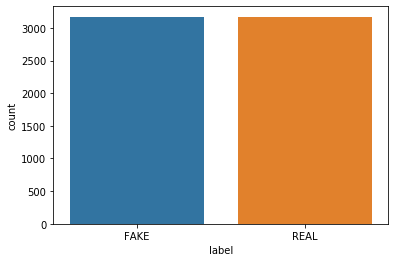

In [2]:
df=pd.read_csv('news.csv')
print("Shape of Data: ",df.shape)
df=df.drop('Unnamed: 0',axis=1)
print("Data Size:\n",df.groupby('label').size())
labels=df.label
sns.countplot(df['label'],label="Count")
plt.show()

In [3]:
df.tail()

,title,text,label
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [4]:
text=df.iloc[:,1].values
processed_features = []
import re
#processed_features = [word.lower() for word in features] 
for sentence in range(0, len(text)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(text[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', '', processed_feature)
    #Search for all non-letters Replace all non-letters with spaces
    processed_feature = re.sub("[^a-zA-Z]"," ", str(processed_feature))

    # Search for only alphabet
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', '', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    shortword = re.compile(r'\W*\b\w{1,2}\b')
    processed_feature=shortword.sub('', processed_feature)
    
    #add spaces between words
    processed_feature=re.sub('([A-Z])', r' \1', processed_feature)
    # Converting to Lowercase
    processed_feature= processed_feature.lower()
    processed_features.append(processed_feature)

Clean_News=processed_features
df['Clean_News']=Clean_News
df.head()

,title,text,label,Clean_News
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,daniel greenfield shillman journalism fell...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit st...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,u secretary state john kerry said monday t...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,kaydee king kaydee king november the les...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,itprimary day new york and front runners h...


In [5]:
df.tail()

,title,text,label,Clean_News
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,the state department told the republican ...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,thein p b s should stand for plutocratic ...
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,anti trump protesters are tools the oli...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,a d d i s a b a b a ethiopia president ob...
6334,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL,jeb bush suddenly attacking trump here w...


# Splitting Data Set

In [6]:
x_train,x_test,y_train,y_test=train_test_split(df['Clean_News'], labels, test_size=0.3)
labels=["FAKE","REAL"]

# VISUALIZING TRAINING & TEST DATA

In [7]:
print("------TRAINING DATA------")
print(x_train)

------TRAINING DATA------
4810    multi party system normal says  richard  winge...
4398     america should shaken its very core what happ...
1331     donald  trumprise spurringbacklash from  lati...
5349     comments  the conservative political machine ...
4599     trump  and  his  supporters  are  fighting ri...
                              ...                        
5832     ted  cruz won more delegates than anyone else...
62       buried beneath  wednesdayeye popping headline...
2196      claire  bernish thefreethoughtproject com  i...
5938      news  google appoints  vice  president  goog...
2953     nasty feud that escalated  thursday between  ...
Name: Clean_News, Length: 4434, dtype: object


In [8]:
print("------TEST DATA------")
print(x_test)

------TEST DATA------
5951     when the  commission  presidential  debates  ...
3178      slowed healing and recovery time  increased ...
4418     print  whispers payback are being directed  h...
5979     hillary  clinton won least four five primarie...
4069     some the biggest donors and fundraisers the  ...
                              ...                        
895       b a r editor and senior columnist  margaret ...
2724     posted  october  michael  de pinto  for anyon...
693      pinterest  itbeenquarter century since  supre...
4246      shem  jamal  for almostdecade many have hear...
3888     inmarketing fiasco that could rank right ther...
Name: Clean_News, Length: 1901, dtype: object


# TFIDF-VECTORIZER

In [9]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [10]:
print("*********TFIDF - TRAIN DATA**********")
print(tfidf_train.shape,"\n")
print(tfidf_train)

*********TFIDF - TRAIN DATA**********
(4434, 122381) 

  (0, 110911)	0.06840171132476472
  (0, 82907)	0.062082529267854764
  (0, 101235)	0.04964243659313484
  (0, 37313)	0.03323471418207498
  (0, 39166)	0.08109899063117307
  (0, 71090)	0.051661580124520365
  (0, 29565)	0.08109899063117307
  (0, 80699)	0.03136022570984683
  (0, 67128)	0.0647400091090431
  (0, 2786)	0.10464875668879631
  (0, 17718)	0.04925915107674897
  (0, 42590)	0.07151380932001909
  (0, 2794)	0.06604494837865277
  (0, 84955)	0.04375455873187465
  (0, 41353)	0.03442228505009056
  (0, 108577)	0.03795507330750395
  (0, 10386)	0.04722998957629307
  (0, 84771)	0.06037865591490885
  (0, 56050)	0.03355596400212095
  (0, 44189)	0.028271871836849954
  (0, 44315)	0.022093728172809298
  (0, 12322)	0.0850614097419711
  (0, 4096)	0.06358897109842306
  (0, 106138)	0.025825652448566595
  (0, 33278)	0.06537071361215396
  :	:
  (4433, 87896)	0.01812876036508278
  (4433, 106111)	0.017006967890556113
  (4433, 9537)	0.023446205697972344


In [11]:
print("*********TFIDF - TEST DATA**********")
print(tfidf_test.shape,"\n")
print(tfidf_test)

*********TFIDF - TEST DATA**********
(1901, 122381) 

  (0, 121844)	0.051391572399830096
  (0, 121180)	0.016145031630445145
  (0, 120846)	0.01759871707304027
  (0, 120646)	0.013502266262099915
  (0, 119989)	0.039683649205379444
  (0, 119976)	0.03830797411381778
  (0, 118942)	0.018514813882225218
  (0, 118912)	0.016659186222766898
  (0, 118868)	0.018420492708614858
  (0, 118818)	0.053982369002382985
  (0, 116747)	0.014601152146136631
  (0, 116483)	0.04043282465111332
  (0, 116390)	0.020350067256163583
  (0, 115571)	0.022924071903080715
  (0, 115077)	0.025363793738568074
  (0, 114875)	0.0318146020559394
  (0, 114573)	0.04963427769216899
  (0, 114563)	0.018850179246738742
  (0, 114538)	0.06167378246371295
  (0, 114069)	0.0206382223994533
  (0, 114055)	0.015733787989698274
  (0, 114044)	0.016569562450046402
  (0, 113997)	0.017134378284081743
  (0, 113862)	0.03267173023461788
  (0, 113711)	0.03231735121298069
  :	:
  (1900, 19138)	0.0905644770969307
  (1900, 17742)	0.053411566205381296
  (1

# Passive Aggressive Classifier

In [12]:
PA_Model=PassiveAggressiveClassifier()
PA_Model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [13]:
#Accuracy
pred_PA=PA_Model.predict(tfidf_test)

accuracy_PA=accuracy_score(y_test,pred_PA)
accuracy_PA=round(accuracy_PA*100,2)
print(f'Accuracy of Passive Aggressive Model : {accuracy_PA}%')

Accuracy of Passive Aggressive Model : 94.11%


True Negative - TN =  889 
False Positive - FP =  51 
 False Negative - FN =  61 
True Positive - TP =  900
Confusion Matrix of Passive Aggressive Algorithm :
 [[889  51]
 [ 61 900]]
Sensitivity =  0.9365244536940687
Specifity =  0.9457446808510638
Recall =  0.9365244536940687
Precision =  0.9463722397476341
F1_Score =  0.9414225941422594
Classification Report 
               precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94       940
        REAL       0.95      0.94      0.94       961

    accuracy                           0.94      1901
   macro avg       0.94      0.94      0.94      1901
weighted avg       0.94      0.94      0.94      1901



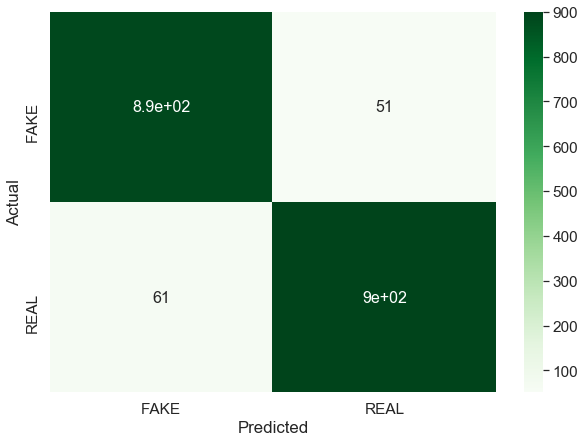

In [14]:
#Performance Measure
tnPA,fpPA,fnPA,tpPA=confusion_matrix(y_test,pred_PA).ravel()
print('True Negative - TN = ',tnPA,"\nFalse Positive - FP = ",fpPA,"\n False Negative - FN = ",fnPA,"\nTrue Positive - TP = ",
      tpPA)
conf_matrix_PA=confusion_matrix(y_test,pred_PA)
print('Confusion Matrix of Passive Aggressive Algorithm :\n',conf_matrix_PA)

sensitivityPA=tpPA/(tpPA+fnPA)
print("Sensitivity = ",sensitivityPA)
specificityPA=tnPA/(tnPA+fpPA)
print("Specifity = ",specificityPA)
recallPA=tpPA/(tpPA+fnPA)
print("Recall = ",recallPA)
PrecisionPA=tpPA/(tpPA+fpPA)
print("Precision = ",PrecisionPA)

F1_PA = 2 * ((PrecisionPA * recallPA) / (PrecisionPA + recallPA))
print("F1_Score = ",F1_PA)

print("Classification Report \n",classification_report(y_test,pred_PA))

df_cm = pd.DataFrame(conf_matrix_PA, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Greens", annot=True,annot_kws={"size": 16})

Text(0, 0.5, 'PREDICTED DATA')

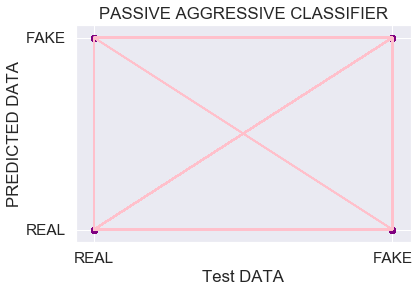

In [15]:
plt.scatter(y_test,pred_PA, color = "purple")
plt.plot(y_test,pred_PA, color = "pink")
plt.title("PASSIVE AGGRESSIVE CLASSIFIER")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

CHECKING VALUES OF Y TEST & PREDICTED ARRAY

In [16]:
y_test_dtype=y_test.to_numpy(dtype = '<U4')
print("Converted y_test array in <U4 type: ",y_test_dtype)
print("y_test data type: ",y_test_dtype.dtype)
print("Predicted Data through Passive aggressive:",pred_PA)
print("Predicted Data ",pred_PA.dtype)
print("Pred Data Shape ",pred_PA.shape)
print("Test Data Shape ",y_test.shape)

Converted y_test array in <U4 type:  ['REAL' 'FAKE' 'FAKE' ... 'FAKE' 'FAKE' 'REAL']
y_test data type:  <U4
Predicted Data through Passive aggressive: ['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']
Predicted Data  <U4
Pred Data Shape  (1901,)
Test Data Shape  (1901,)


# Coverting Target data into binary values to plot AUC Curve

In [17]:
my_target = {'FAKE': 0, 'REAL': 1}
y_test_auc=np.vectorize(my_target.get)(y_test_dtype)
print(y_test_auc)
pred_PA_auc=np.vectorize(my_target.get)(pred_PA)
print(pred_PA_auc)

[1 0 0 ... 0 0 1]
[1 0 1 ... 0 0 1]


# Calculating AUC 

In [18]:
fpr_PA, tpr_PA, thresholds = metrics.roc_curve(y_test_auc, pred_PA_auc, pos_label={0,1})
auc_PA=metrics.auc(fpr_PA, tpr_PA)
print("\nAUC: ", auc_PA)
auc_roc_PA=roc_auc_score(y_test_auc, pred_PA_auc)
print("AUC through alternate Method: ",auc_roc_PA)


AUC:  nan
AUC through alternate Method:  0.9411345672725662


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


# Plotting ROC Curve of Passive Aggressive Classifier 

C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


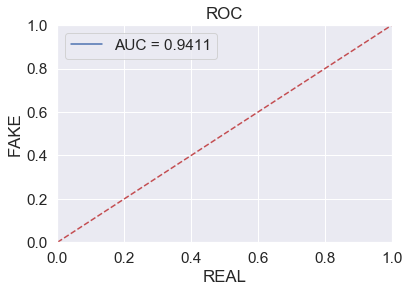

In [19]:
plt.title('ROC')
plt.plot(fpr_PA, tpr_PA, label='AUC = %0.4f'% auc_roc_PA)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# Multinomial Naive Byes

In [20]:
NaveByes = MultinomialNB() 
NaveByes.fit(tfidf_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
pred_NB = NaveByes.predict(tfidf_test) 
#Accuracy
accuracy_NB = metrics.accuracy_score(y_test, pred_NB)
accuracy_NB=round(accuracy_NB*100,2)
print(f'Accuracy of Naive Byes Model : {accuracy_NB}%')

Accuracy of Naive Byes Model : 83.01%


True Negative - TN =  634 
False Positive - FP =  306 
 False Negative - FN =  17 
True Positive - TP =  944
Sensitivity =  0.9823100936524454
Specifity =  0.674468085106383
Recall =  0.9823100936524454
Precision =  0.7552
F1_Score =  0.8539122568973315
Confusion Matrix of Naive Byes Algorithm :
 [[634 306]
 [ 17 944]]
Classification Report 
               precision    recall  f1-score   support

        FAKE       0.97      0.67      0.80       940
        REAL       0.76      0.98      0.85       961

    accuracy                           0.83      1901
   macro avg       0.86      0.83      0.83      1901
weighted avg       0.86      0.83      0.83      1901



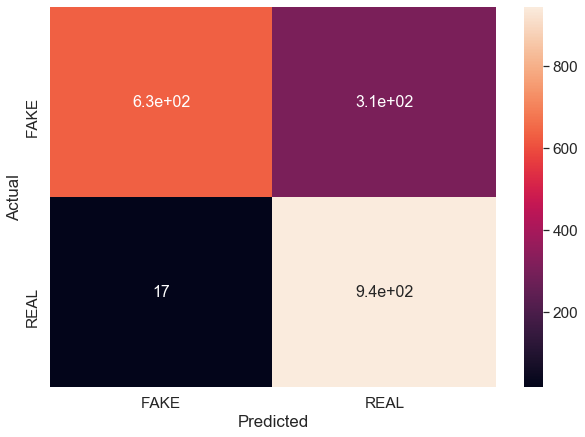

In [22]:
#Performance measures
tnNB,fpNB,fnNB,tpNB=confusion_matrix(y_test,pred_NB).ravel()
print('True Negative - TN = ',tnNB,"\nFalse Positive - FP = ",fpNB,"\n False Negative - FN = ",fnNB,"\nTrue Positive - TP = ",
      tpNB)

sensitivityNB=tpNB/(tpNB+fnNB)
print("Sensitivity = ",sensitivityNB)
specificityNB=tnNB/(tnNB+fpNB)
print("Specifity = ",specificityNB)
recallNB=tpNB/(tpNB+fnNB)
print("Recall = ",recallNB)
PrecisionNB=tpNB/(tpNB+fpNB)
print("Precision = ",PrecisionNB)

F1_NB = 2 * ((PrecisionNB * recallNB) / (PrecisionNB + recallNB))
print("F1_Score = ",F1_NB)

conf_matrix_NB=confusion_matrix(y_test,pred_NB)
print('Confusion Matrix of Naive Byes Algorithm :\n',conf_matrix_NB)

print("Classification Report \n",classification_report(y_test,pred_NB))

df_cm = pd.DataFrame(conf_matrix_NB, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})



Text(0, 0.5, 'PREDICTED DATA')

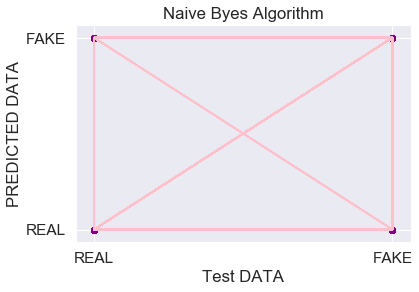

In [23]:
plt.scatter(y_test,pred_NB, color = "purple")
plt.plot(y_test,pred_NB, color = "pink")
plt.title("Naive Byes Algorithm")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

# Working For AUC

[1 0 1 ... 1 0 1]

AUC:  nan
AUC through alternate Method:  0.8283890893794141


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


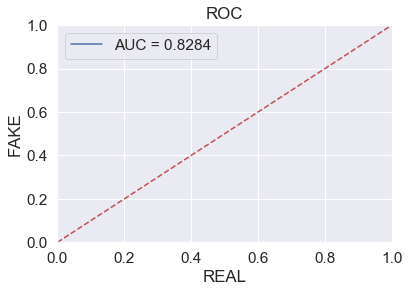

In [24]:
pred_NB_auc=np.vectorize(my_target.get)(pred_NB)
print(pred_NB_auc)
fpr_NB, tpr_NB, thresholds = metrics.roc_curve(y_test_auc, pred_NB_auc, pos_label={0,1})
auc_NB=metrics.auc(fpr_NB, tpr_NB)
print("\nAUC: ", auc_NB)
auc_roc_NB=roc_auc_score(y_test_auc, pred_NB_auc)
print("AUC through alternate Method: ",auc_roc_NB)
plt.title('ROC')
plt.plot(fpr_NB, tpr_NB, label='AUC = %0.4f'% auc_roc_NB)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# Logistic Regression

In [25]:
model_Logistic = LogisticRegression()
model_Logistic.fit(tfidf_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred_Log = model_Logistic.predict(tfidf_test) 
#Accuracy
accuracy_Log = accuracy_score(y_test, pred_Log) 
accuracy_Log=round(accuracy_Log*100,2)
print(f'Accuracy of Logistic Regression Model : {accuracy_Log}%')

Accuracy of Logistic Regression Model : 91.11%


True Negative - TN =  881 
False Positive - FP =  59 
 False Negative - FN =  110 
True Positive - TP =  851
Sensitivity =  0.8855359001040582
Specifity =  0.9372340425531915
Recall =  0.8855359001040582
Precision =  0.9351648351648352
F1_Score =  0.9096739711384287
Confusion Matrix of Logistic Regression Algorithm :
 [[881  59]
 [110 851]]
Classification Report 
               precision    recall  f1-score   support

        FAKE       0.89      0.94      0.91       940
        REAL       0.94      0.89      0.91       961

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901



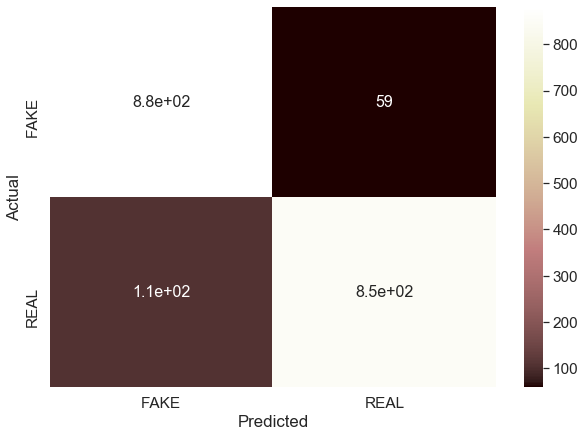

In [27]:
#Performance Measure
tnLog,fpLog,fnLog,tpLog=confusion_matrix(y_test,pred_Log).ravel()
print('True Negative - TN = ',tnLog,"\nFalse Positive - FP = ",fpLog,"\n False Negative - FN = ",fnLog,"\nTrue Positive - TP = ",
      tpLog)
sensitivityLog=tpLog/(tpLog+fnLog)
print("Sensitivity = ",sensitivityLog)
specificityLog=tnLog/(tnLog+fpLog)
print("Specifity = ",specificityLog)
recallLog=tpLog/(tpLog+fnLog)
print("Recall = ",recallLog)
PrecisionLog=tpLog/(tpLog+fpLog)
print("Precision = ",PrecisionLog)

F1_Log = 2 * ((PrecisionLog * recallLog) / (PrecisionLog + recallLog))
print("F1_Score = ",F1_Log)

conf_matrix_Log=confusion_matrix(y_test,pred_Log)
print('Confusion Matrix of Logistic Regression Algorithm :\n',conf_matrix_Log)

print("Classification Report \n",classification_report(y_test,pred_Log))
df_cm = pd.DataFrame(conf_matrix_Log, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="pink", annot=True,annot_kws={"size": 16})# font size

Text(0, 0.5, 'PREDICTED DATA')

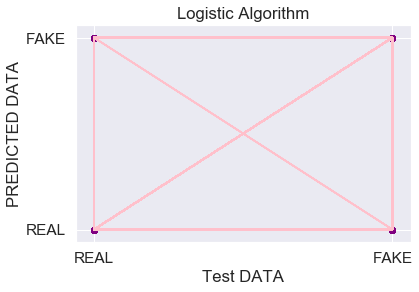

In [28]:
plt.scatter(y_test,pred_Log, color = "purple")
plt.plot(y_test,pred_Log, color = "pink")
plt.title("Logistic Algorithm")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

# Working For AUC

[1 0 1 ... 0 0 1]

AUC:  nan
AUC through alternate Method:  0.911384971328625


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


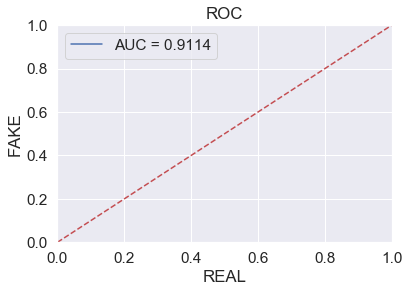

In [29]:
pred_Log_auc=np.vectorize(my_target.get)(pred_Log)
print(pred_Log_auc)
fpr_Log, tpr_Log, thresholds = metrics.roc_curve(y_test_auc, pred_Log_auc, pos_label={0,1})
auc_Log=metrics.auc(fpr_Log, tpr_Log)
print("\nAUC: ", auc_Log)
auc_roc_Log=roc_auc_score(y_test_auc, pred_Log_auc)
print("AUC through alternate Method: ",auc_roc_Log)
plt.title('ROC')
plt.plot(fpr_Log, tpr_Log, label='AUC = %0.4f'% auc_roc_Log)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# Decision Tree

In [30]:
model_Tree=tree.DecisionTreeClassifier()
model_Tree.fit(tfidf_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
#Accuracy
DT_predict=model_Tree.predict(tfidf_test)

acc_DT=accuracy_score(y_test,DT_predict)
acc_DT=round(acc_DT*100,2)
print(f'Accuracy of Decision Tree : {acc_DT}%')

Accuracy of Decision Tree : 78.38%


True Negative - TN =  730 
False Positive - FP =  210 
 False Negative - FN =  201 
True Positive - TP =  760
Sensitivity =  0.7908428720083247
Specifity =  0.776595744680851
Recall =  0.7908428720083247
Precision =  0.7835051546391752
F1_Score =  0.7871569135163128
Confusion Matrix of Decision Tree :
 [[730 210]
 [201 760]]
Classification Report 
               precision    recall  f1-score   support

        FAKE       0.78      0.78      0.78       940
        REAL       0.78      0.79      0.79       961

    accuracy                           0.78      1901
   macro avg       0.78      0.78      0.78      1901
weighted avg       0.78      0.78      0.78      1901



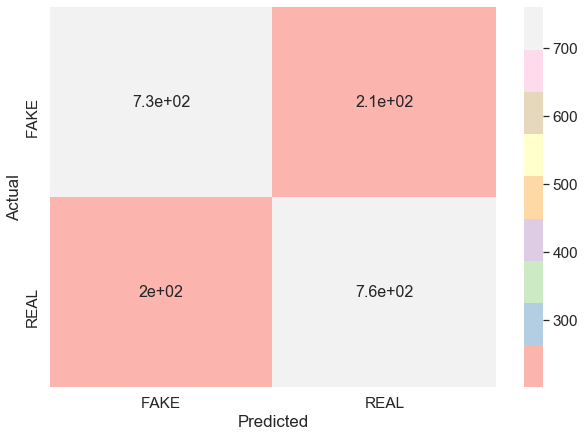

In [32]:
#performance Measure

tnDT,fpDT,fnDT,tpDT=confusion_matrix(y_test,DT_predict).ravel()
print('True Negative - TN = ',tnDT,"\nFalse Positive - FP = ",fpDT,"\n False Negative - FN = ",fnDT,"\nTrue Positive - TP = ",
      tpDT)
sensitivityDT=tpDT/(tpDT+fnDT)
print("Sensitivity = ",sensitivityDT)
specificityDT=tnDT/(tnDT+fpDT)
print("Specifity = ",specificityDT)
recallDT=tpDT/(tpDT+fnDT)
print("Recall = ",recallDT)
PrecisionDT=tpDT/(tpDT+fpDT)
print("Precision = ",PrecisionDT)

F1_DT = 2 * ((PrecisionDT * recallDT) / (PrecisionDT + recallDT))
print("F1_Score = ",F1_DT)

conf_matrix_DT=confusion_matrix(y_test,DT_predict)
print('Confusion Matrix of Decision Tree :\n',conf_matrix_DT)

print("Classification Report \n",classification_report(y_test,DT_predict))

df_cm = pd.DataFrame(conf_matrix_DT, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Pastel1", annot=True,annot_kws={"size": 16})# font size

Text(0, 0.5, 'PREDICTED DATA')

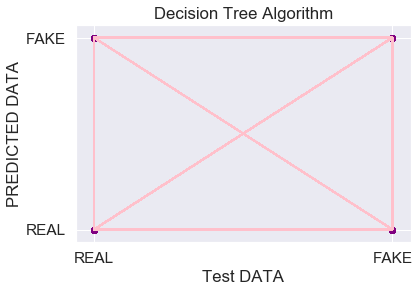

In [33]:
plt.scatter(y_test,DT_predict, color = "purple")
plt.plot(y_test,DT_predict, color = "pink")
plt.title("Decision Tree Algorithm")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

# AUC Working

[1 0 0 ... 0 0 1]

AUC:  nan
AUC through alternate Method:  0.7837193083445879


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


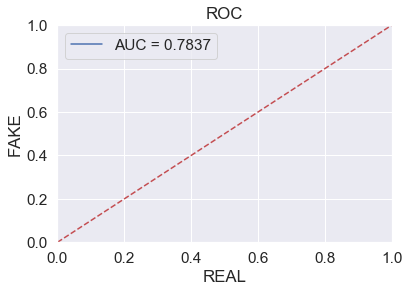

In [34]:
pred_DT_auc=np.vectorize(my_target.get)(DT_predict)
print(pred_DT_auc)
fpr_DT, tpr_DT, thresholds = metrics.roc_curve(y_test_auc, pred_DT_auc, pos_label={0,1})
auc_DT=metrics.auc(fpr_DT, tpr_DT)
print("\nAUC: ", auc_DT)
auc_roc_DT=roc_auc_score(y_test_auc, pred_DT_auc)
print("AUC through alternate Method: ",auc_roc_DT)
plt.title('ROC')
plt.plot(fpr_DT, tpr_DT, label='AUC = %0.4f'% auc_roc_DT)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# Random Forest

In [35]:
model_RF=RandomForestClassifier()
model_RF.fit(tfidf_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy of Random Forest : 87.85%
True Negative - TN =  827 
False Positive - FP =  113 
 False Negative - FN =  118 
True Positive - TP =  843
Sensitivity =  0.8772112382934444
Specifity =  0.8797872340425532
Recall =  0.8772112382934444
Precision =  0.8817991631799164
F1_Score =  0.8794992175273866
Confusion Matrix of Random Forest :
 [[827 113]
 [118 843]]
Classification Report 
               precision    recall  f1-score   support

        FAKE       0.88      0.88      0.88       940
        REAL       0.88      0.88      0.88       961

    accuracy                           0.88      1901
   macro avg       0.88      0.88      0.88      1901
weighted avg       0.88      0.88      0.88      1901



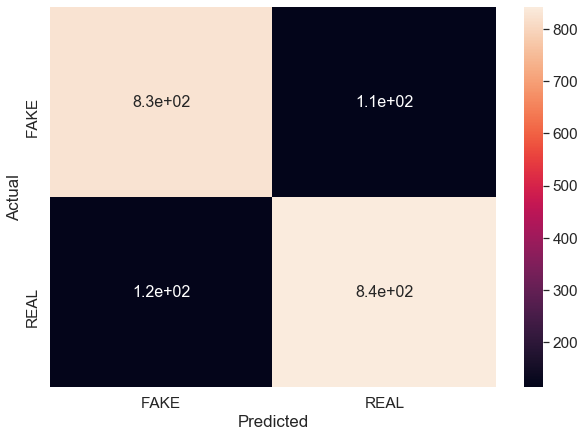

In [36]:
RF_predict=model_RF.predict(tfidf_test)

accRF=accuracy_score(y_test,RF_predict)
accRF=round(accRF*100,2)
print(f'Accuracy of Random Forest : {accRF}%')

tnRF,fpRF,fnRF,tpRF=confusion_matrix(y_test,RF_predict).ravel()
print('True Negative - TN = ',tnRF,"\nFalse Positive - FP = ",fpRF,"\n False Negative - FN = ",fnRF,"\nTrue Positive - TP = ",
      tpRF)
sensitivityRF=tpRF/(tpRF+fnRF)
print("Sensitivity = ",sensitivityRF)
specificityRF=tnRF/(tnRF+fpRF)
print("Specifity = ",specificityRF)
recallRF=tpRF/(tpRF+fnRF)
print("Recall = ",recallRF)
PrecisionRF=tpRF/(tpRF+fpRF)
print("Precision = ",PrecisionRF)

F1_RF = 2 * ((PrecisionRF * recallRF) / (PrecisionRF + recallRF))
print("F1_Score = ",F1_RF)

conf_matrix_RF=confusion_matrix(y_test,RF_predict)
print('Confusion Matrix of Random Forest :\n',conf_matrix_RF)
print("Classification Report \n",classification_report(y_test,RF_predict))
df_cm = pd.DataFrame(conf_matrix_RF, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="rocket", annot=True,annot_kws={"size": 16})# font size

Text(0, 0.5, 'PREDICTED DATA')

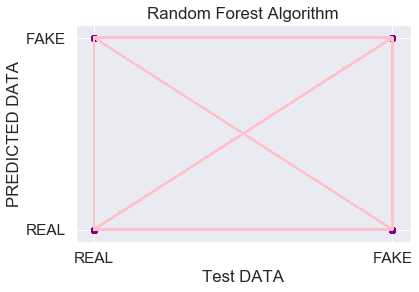

In [37]:
plt.scatter(y_test,RF_predict, color = "purple")
plt.plot(y_test,RF_predict, color = "pink")
plt.title("Random Forest Algorithm")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

# AUC Work

[1 0 0 ... 0 0 1]

AUC:  nan
AUC through alternate Method:  0.8784992361679989


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


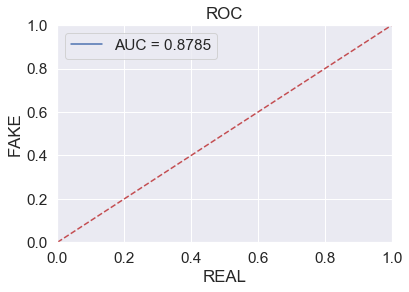

In [38]:
pred_RF_auc=np.vectorize(my_target.get)(RF_predict)
print(pred_RF_auc)
fpr_RF, tpr_RF, thresholds = metrics.roc_curve(y_test_auc, pred_RF_auc, pos_label={0,1})
auc_RF=metrics.auc(fpr_RF, tpr_RF)
print("\nAUC: ", auc_RF)
auc_roc_RF=roc_auc_score(y_test_auc, pred_RF_auc)
print("AUC through alternate Method: ",auc_roc_RF)
plt.title('ROC')
plt.plot(fpr_RF, tpr_RF, label='AUC = %0.4f'% auc_roc_RF)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# K-NEAREST NEIGHBOUR

In [39]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(tfidf_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy of KNN : 53.24%
True Negative - TN =  940 
False Positive - FP =  0 
 False Negative - FN =  889 
True Positive - TP =  72
Sensitivity =  0.07492195629552549
Specifity =  1.0
Recall =  0.07492195629552549
Precision =  1.0
F1_Score =  0.1393998063891578
Confusion Matrix of KNN :
 [[940   0]
 [889  72]]
Classification Report 
               precision    recall  f1-score   support

        FAKE       0.51      1.00      0.68       940
        REAL       1.00      0.07      0.14       961

    accuracy                           0.53      1901
   macro avg       0.76      0.54      0.41      1901
weighted avg       0.76      0.53      0.41      1901



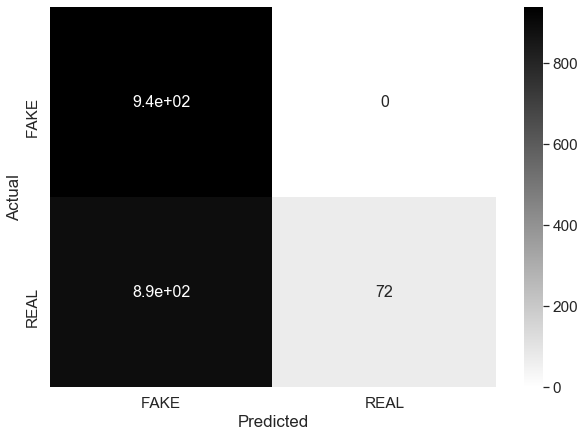

In [40]:
KNN_pred = KNN_model.predict(tfidf_test)

accKNN = accuracy_score(y_test,KNN_pred)
accKNN=round(accKNN*100,2)
print(f'Accuracy of KNN : {accKNN}%')

tnKNN,fpKNN,fnKNN,tpKNN=confusion_matrix(y_test,KNN_pred).ravel()
print('True Negative - TN = ',tnKNN,"\nFalse Positive - FP = ",fpKNN,"\n False Negative - FN = ",fnKNN,"\nTrue Positive - TP = ",
      tpKNN)

sensitivityKNN=tpKNN/(tpKNN+fnKNN)
print("Sensitivity = ",sensitivityKNN)
specificityKNN=tnKNN/(tnKNN+fpKNN)
print("Specifity = ",specificityKNN)
recallKNN=tpKNN/(tpKNN+fnKNN)
print("Recall = ",recallKNN)
PrecisionKNN=tpKNN/(tpKNN+fpKNN)
print("Precision = ",PrecisionKNN)

F1_KNN = 2 * ((PrecisionKNN * recallKNN) / (PrecisionKNN + recallKNN))
print("F1_Score = ",F1_KNN)

conf_matrix_KNN=confusion_matrix(y_test,KNN_pred)
print('Confusion Matrix of KNN :\n',conf_matrix_KNN)

print("Classification Report \n",classification_report(y_test,KNN_pred))
df_cm = pd.DataFrame(conf_matrix_KNN, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="gist_gray_r", annot=True,annot_kws={"size": 16})# font size

Text(0, 0.5, 'PREDICTED DATA')

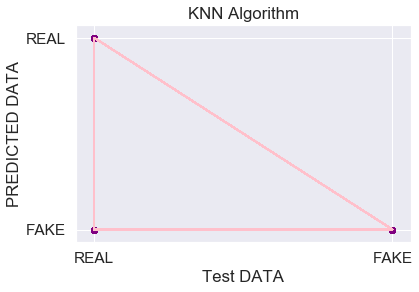

In [41]:
plt.scatter(y_test,KNN_pred, color = "purple")
plt.plot(y_test,KNN_pred, color = "pink")
plt.title("KNN Algorithm")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

# AUC Working

[0 0 0 ... 0 0 0]

AUC:  nan
AUC through alternate Method:  0.5374609781477627


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


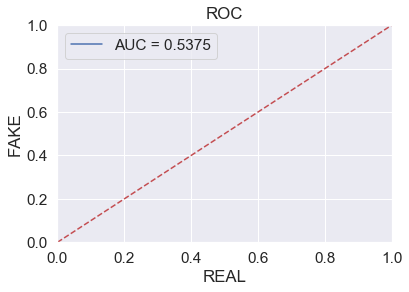

In [42]:
pred_KNN_auc=np.vectorize(my_target.get)(KNN_pred)
print(pred_KNN_auc)
fpr_KNN, tpr_KNN, thresholds = metrics.roc_curve(y_test_auc, pred_KNN_auc, pos_label={0,1})
auc_KNN=metrics.auc(fpr_KNN, tpr_KNN)
print("\nAUC: ", auc_KNN)
auc_roc_KNN=roc_auc_score(y_test_auc, pred_KNN_auc)
print("AUC through alternate Method: ",auc_roc_KNN)
plt.title('ROC')
plt.plot(fpr_KNN, tpr_KNN, label='AUC = %0.4f'% auc_roc_KNN)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# SVM

In [43]:
svm = SVC()
svm.fit(tfidf_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy of SVM : 92.43%
True Negative - TN =  896 
False Positive - FP =  44 
 False Negative - FN =  100 
True Positive - TP =  861
Sensitivity =  0.8959417273673257
Specifity =  0.9531914893617022
Recall =  0.8959417273673257
Precision =  0.9513812154696133
F1_Score =  0.9228295819935692
Confusion Matrix of SVM :
 [[896  44]
 [100 861]]


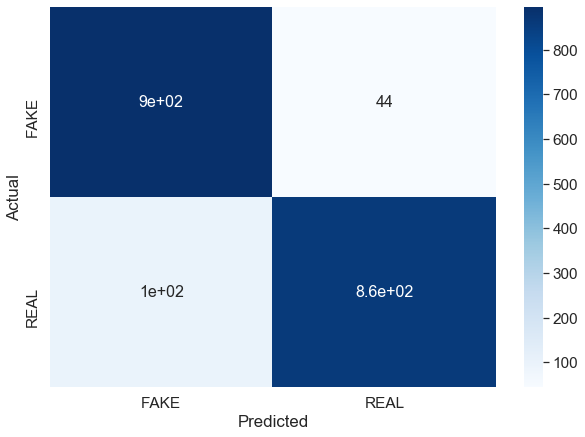

In [44]:
svm_pred=svm.predict(tfidf_test)

accSVM = accuracy_score(y_test,svm_pred)
accSVM=round(accSVM*100,2)
print(f'Accuracy of SVM : {accSVM}%')

tnSVM,fpSVM,fnSVM,tpSVM=confusion_matrix(y_test,svm_pred).ravel()
print('True Negative - TN = ',tnSVM,"\nFalse Positive - FP = ",fpSVM,"\n False Negative - FN = ",fnSVM,"\nTrue Positive - TP = ",
      tpSVM)
sensitivitySVM=tpSVM/(tpSVM+fnSVM)
print("Sensitivity = ",sensitivitySVM)
specificitySVM=tnSVM/(tnSVM+fpSVM)
print("Specifity = ",specificitySVM)
recallSVM=tpSVM/(tpSVM+fnSVM)
print("Recall = ",recallSVM)
PrecisionSVM=tpSVM/(tpSVM+fpSVM)
print("Precision = ",PrecisionSVM)
F1_SVM = 2 * ((PrecisionSVM * recallSVM) / (PrecisionSVM + recallSVM))
print("F1_Score = ",F1_SVM)

conf_matrixSVM=confusion_matrix(y_test,svm_pred)
print('Confusion Matrix of SVM :\n',conf_matrixSVM)

df_cm = pd.DataFrame(conf_matrixSVM, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Text(0, 0.5, 'PREDICTED DATA')

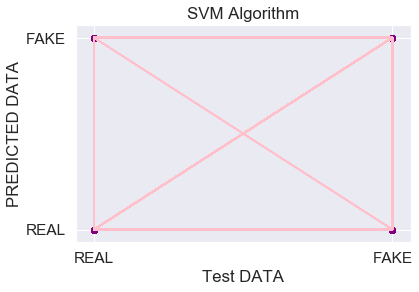

In [45]:
plt.scatter(y_test,svm_pred, color = "purple")
plt.plot(y_test,svm_pred, color = "pink")
plt.title("SVM Algorithm")
plt.xlabel("Test DATA")
plt.ylabel('PREDICTED DATA')

#  AUC Work

[1 0 0 ... 0 0 1]

AUC:  nan
AUC through alternate Method:  0.9245666083645139


C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\javeria\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'uper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


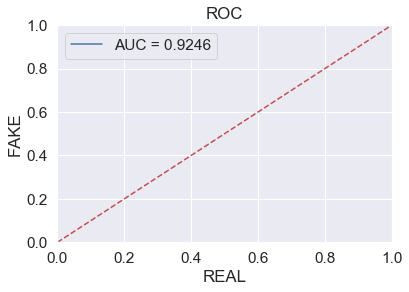

In [46]:
pred_SVM_auc=np.vectorize(my_target.get)(svm_pred)
print(pred_SVM_auc)
fpr_SVM, tpr_SVM, thresholds = metrics.roc_curve(y_test_auc, pred_SVM_auc, pos_label={0,1})
auc_SVM=metrics.auc(fpr_SVM, tpr_SVM)
print("\nAUC: ", auc_SVM)
auc_roc_SVM=roc_auc_score(y_test_auc, pred_SVM_auc)
print("AUC through alternate Method: ",auc_roc_SVM)
plt.title('ROC')
plt.plot(fpr_SVM, tpr_SVM, label='AUC = %0.4f'% auc_roc_SVM)
plt.legend(loc='uper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('FAKE')
plt.xlabel('REAL')
plt.show();

# Accuracy Comparison

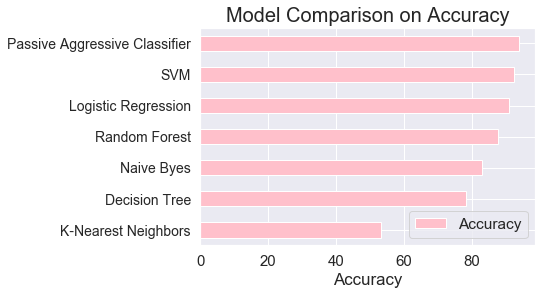

In [47]:
model_comparison = pd.DataFrame({'ML_Models': ['Passive Aggressive Classifier', 'Naive Byes',
                                           'Logistic Regression', 'Decision Tree',
                                            'K-Nearest Neighbors', 'Random Forest','SVM'],
                                 'Accuracy': [accuracy_PA, accuracy_NB, accuracy_Log, 
                                         acc_DT, accKNN,accRF,accSVM]})

model_comparison.sort_values('Accuracy', ascending = True).plot(x = 'ML_Models', y = 'Accuracy', kind = 'barh',
                                                           color = 'pink', edgecolor = 'white')


plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('Accuracy');
plt.xticks(size = 15)
plt.title('Model Comparison on Accuracy', size = 20);

# Sensitivity Comparison

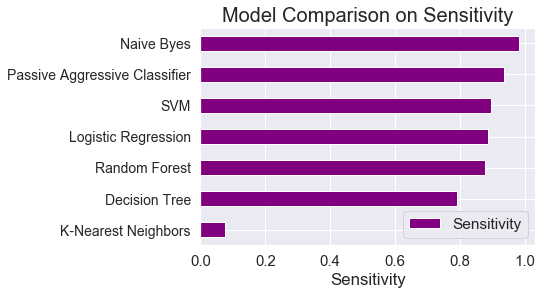

In [48]:
model_comparison_sen = pd.DataFrame({'ML_Models': ['Passive Aggressive Classifier', 'Naive Byes',
                                           'Logistic Regression', 'Decision Tree',
                                            'K-Nearest Neighbors', 'Random Forest','SVM'],
                                 'Sensitivity': [sensitivityPA, sensitivityNB, sensitivityLog, 
                                         sensitivityDT, sensitivityKNN,sensitivityRF,sensitivitySVM]})

model_comparison_sen.sort_values('Sensitivity', ascending = True).plot(x = 'ML_Models', y = 'Sensitivity', kind = 'barh',
                                                           color = 'purple', edgecolor = 'white')

plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('Sensitivity');
plt.xticks(size = 15)
plt.title('Model Comparison on Sensitivity', size = 20);

# Specifity Comparison

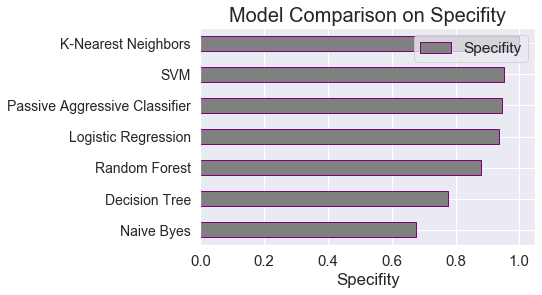

In [49]:
model_comparison_sp = pd.DataFrame({'ML_Models': ['Passive Aggressive Classifier', 'Naive Byes',
                                           'Logistic Regression', 'Decision Tree',
                                            'K-Nearest Neighbors', 'Random Forest','SVM'],
                                 'Specifity': [specificityPA, specificityNB, specificityLog, 
                                         specificityDT, specificityKNN,specificityRF,specificitySVM]})

model_comparison_sp.sort_values('Specifity', ascending = True).plot(x = 'ML_Models', y = 'Specifity', kind = 'barh',
                                                           color = 'gray', edgecolor = 'purple')

plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('Specifity');
plt.xticks(size = 15)
plt.title('Model Comparison on Specifity', size = 20);

# Model Comparison On Precision

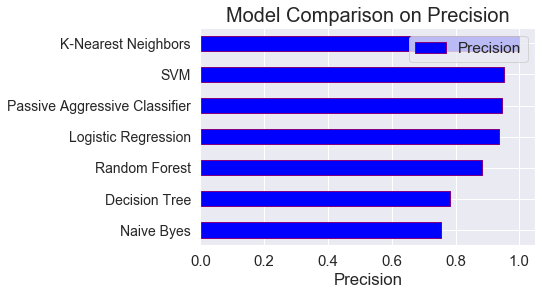

In [50]:
model_comparison_sp = pd.DataFrame({'ML_Models': ['Passive Aggressive Classifier', 'Naive Byes',
                                           'Logistic Regression', 'Decision Tree',
                                            'K-Nearest Neighbors', 'Random Forest','SVM'],
                                 'Precision': [PrecisionPA, PrecisionNB, PrecisionLog, 
                                         PrecisionDT, PrecisionKNN,PrecisionRF,PrecisionSVM]})

model_comparison_sp.sort_values('Precision', ascending = True).plot(x = 'ML_Models', y = 'Precision', kind = 'barh',
                                                           color = 'blue', edgecolor = 'purple')

plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('Precision');
plt.xticks(size = 15)
plt.title('Model Comparison on Precision', size = 20);

# Model Comparison On F1_Score

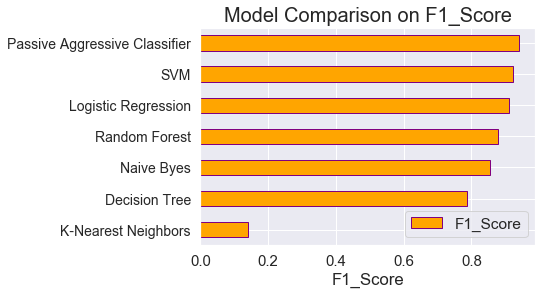

In [51]:
model_comparison_sp = pd.DataFrame({'ML_Models': ['Passive Aggressive Classifier', 'Naive Byes',
                                           'Logistic Regression', 'Decision Tree',
                                            'K-Nearest Neighbors', 'Random Forest','SVM'],
                                 'F1_Score': [F1_PA, F1_NB, F1_Log, 
                                         F1_DT, F1_KNN,F1_RF,F1_SVM]})

model_comparison_sp.sort_values('F1_Score', ascending = True).plot(x = 'ML_Models', y = 'F1_Score', kind = 'barh',
                                                           color = 'orange', edgecolor = 'purple')

plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('F1_Score');
plt.xticks(size = 15)
plt.title('Model Comparison on F1_Score', size = 20);

# Model Comparison on AUC

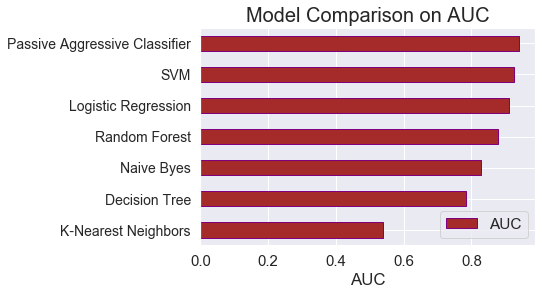

In [52]:
model_comparison_sp = pd.DataFrame({'ML_Models': ['Passive Aggressive Classifier', 'Naive Byes',
                                           'Logistic Regression', 'Decision Tree',
                                            'K-Nearest Neighbors', 'Random Forest','SVM'],
                                 'AUC': [auc_roc_PA, auc_roc_NB, auc_roc_Log, 
                                         auc_roc_DT, auc_roc_KNN,auc_roc_RF,auc_roc_SVM]})

model_comparison_sp.sort_values('AUC', ascending = True).plot(x = 'ML_Models', y = 'AUC', kind = 'barh',
                                                           color = 'brown', edgecolor = 'purple')

plt.ylabel('');
plt.yticks(size = 14);
plt.xlabel('AUC');
plt.xticks(size = 15)
plt.title('Model Comparison on AUC', size = 20);